## __Step 1 - Importing Data and Libraries__

In [433]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [193]:
# Let's read the csv file that we have created after reformatting the json file 
# that was obtained through the Alphavantage API

BRKA=pd.read_csv("Berkshire_Stock_Historical.csv",index_col="Date",parse_dates=True)

In [194]:
BRKA

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2023-10-27,BRK.A,509478.500,511180.0000,502000.00,503375.05,7910
2023-10-26,BRK.A,512653.005,514999.9900,508320.94,510125.00,7210
2023-10-25,BRK.A,514931.500,516735.0000,511750.01,512400.00,7082
2023-10-24,BRK.A,514760.000,516974.8700,513072.01,516249.90,6713
2023-10-23,BRK.A,508564.000,515889.9988,507122.01,512499.96,8917
...,...,...,...,...,...,...
1999-11-05,BRK.A,66700.000,66900.0000,65300.00,65300.00,13000
1999-11-04,BRK.A,65800.000,66800.0000,65400.00,65900.00,19000
1999-11-03,BRK.A,65900.000,66600.0000,65500.00,65500.00,36000


In [195]:
# Data is sorted from recent to the older dates, so let's reverse it
BRKA=BRKA.iloc[::-1]

In [196]:
# Let's create a copy to keep the original
df=BRKA.copy()

## __Step 2 - EDA and Data Preparation__

### _Step 2.1 - Data Overview & Column Preparetion_

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 1999-11-01 to 2023-10-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  6037 non-null   object 
 1   Open    6037 non-null   float64
 2   High    6037 non-null   float64
 3   Low     6037 non-null   float64
 4   Close   6037 non-null   float64
 5   Volume  6037 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 330.1+ KB


In [198]:
df.describe().round(2)

,Open,High,Low,Close,Volume
count,6037.00,6037.00,6037.00,6037.00,6037.00
mean,187729.36,188989.41,186276.52,187659.78,33648.26
std,126498.84,127375.52,125372.03,126333.79,63794.36
min,41700.00,42600.00,40800.00,41300.00,43.00
25%,89200.00,89700.00,88500.00,89195.00,449.00
50%,126515.00,127612.00,125950.00,126800.00,18000.00
75%,269900.00,272220.00,267592.51,270420.00,47700.00
max,563549.00,566569.97,559100.01,563072.76,2740200.00


In [199]:
# Let's drop the symbol column

In [200]:
df.drop("Symbol",axis=1,inplace=True)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 1999-11-01 to 2023-10-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6037 non-null   float64
 1   High    6037 non-null   float64
 2   Low     6037 non-null   float64
 3   Close   6037 non-null   float64
 4   Volume  6037 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 283.0 KB


### _Step 2.2 - Missing & Duplicate Check_

In [202]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [203]:
df.duplicated().sum()

0

In [204]:
# There is no missing value and duplicated row

### _Step 2.3 - Data Analysis_

<Axes: title={'center': 'Close Price'}, xlabel='Date'>

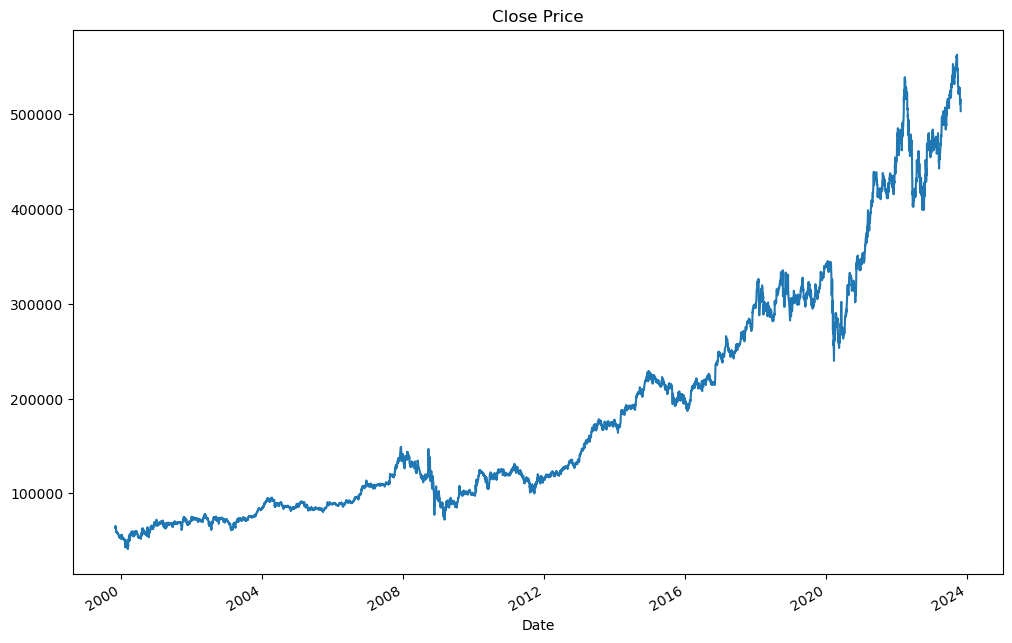

In [205]:
# Let's see the Close price over time
df["Close"].plot(figsize=(12,8),title="Close Price")

<Axes: title={'center': 'Trend'}, xlabel='Date'>

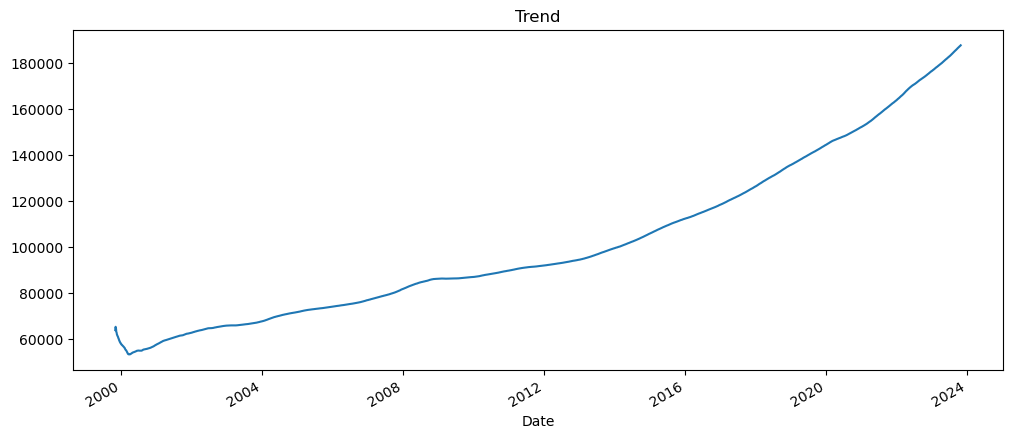

In [206]:
# The main trend over the years
df["Close"].expanding().mean().plot(figsize=(12,5),title="Trend")

<Axes: title={'center': '30 & 60 days MA'}, xlabel='Date'>

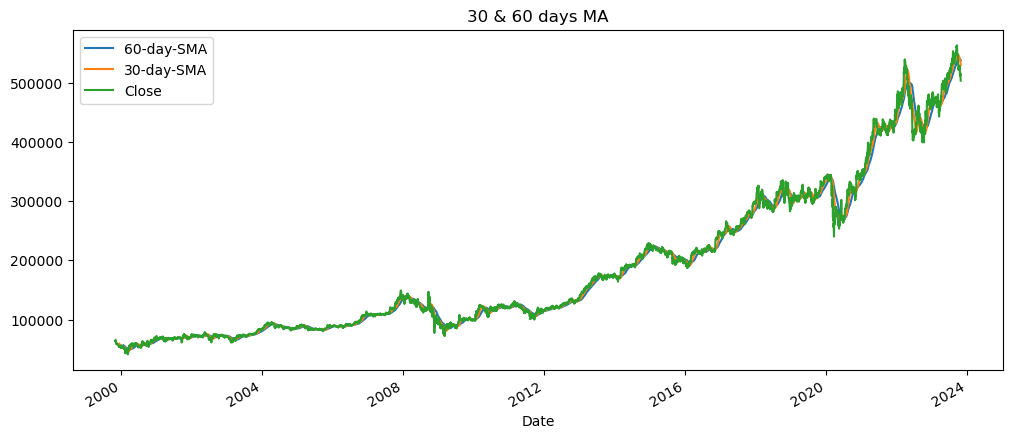

In [207]:
df['30-day-SMA'] = df['Close'].rolling(window=30).mean()
df['60-day-SMA'] = df['Close'].rolling(window=60).mean()
df[['60-day-SMA','30-day-SMA',"Close"]].plot(figsize=(12,5),legend=True,title="30 & 60 days MA")

<Axes: title={'center': '30 & 60 days MA'}, xlabel='Date'>

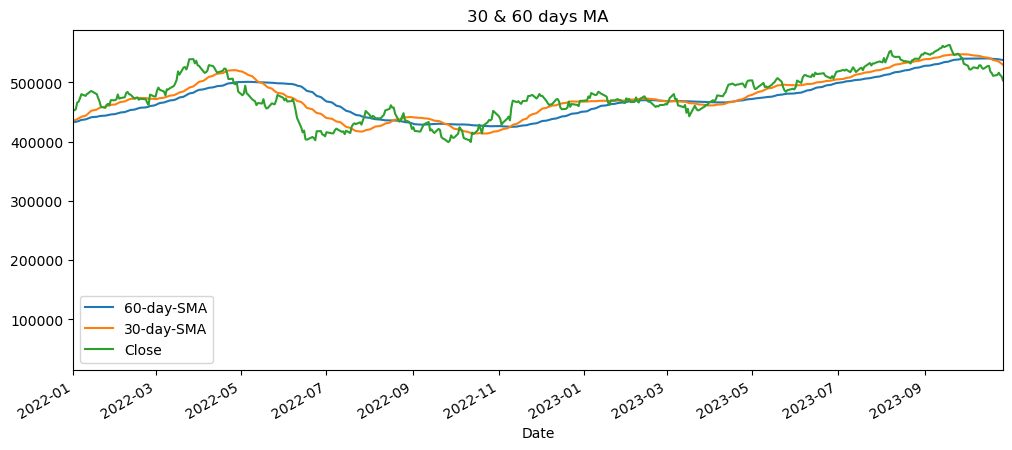

In [208]:
df[['60-day-SMA','30-day-SMA',"Close"]].plot(xlim=["2022-01-01","2023-10-27"],figsize=(12,5),legend=True,title="30 & 60 days MA")

### _Step 2.4 - Data Preparation for Prediction Models_

In [209]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', '30-day-SMA', '60-day-SMA'], dtype='object')

In [210]:
df_stats=df.drop(columns=['Open', 'High', 'Low', 'Volume','30-day-SMA','60-day-SMA']).copy()

In [212]:
df_stats

,Close
Date,
1999-11-01,63700.00
1999-11-02,65305.00
1999-11-03,65500.00
1999-11-04,65900.00
1999-11-05,65300.00
...,...
2023-10-23,512499.96
2023-10-24,516249.90
2023-10-25,512400.00


In [213]:
df_stats.index.freq is None

True

In [214]:
# Converting the frequency of data from none to business days
df_stats=df_stats.asfreq("B")

In [215]:
df_stats.index.freq

<BusinessDay>

In [216]:
# After converting the frequency to working days, non-existing working days will appear, if any
df_stats[df_stats.isna().all(axis=1)]

,Close
Date,
1999-11-25,NaN
1999-12-24,NaN
2000-01-17,NaN
2000-02-21,NaN
2000-04-21,NaN
...,...
2023-04-07,NaN
2023-05-29,NaN
2023-06-19,NaN


In [217]:
# Let's fill the empy 223 data point with forward fill
df_stats.fillna(method="ffill",inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_6744\2821933229.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_stats.fillna(method="ffill",inplace=True)


## __Step 3 - Future Prediction__

### _Step 3.1 - Holt-Winters Model_

#### _Step 3.1.1 - Train Test Split_

In [218]:
df_stats

,Close
Date,
1999-11-01,63700.00
1999-11-02,65305.00
1999-11-03,65500.00
1999-11-04,65900.00
1999-11-05,65300.00
...,...
2023-10-23,512499.96
2023-10-24,516249.90
2023-10-25,512400.00


In [28]:
# Splitting the data into 90% - 10% for training and prediction relatively. I will try to forecast the last 10%
p=int(len(df_stats)*0.9)
p

5634

In [29]:
train_data = df_stats.iloc[:p]
test_data = df_stats.iloc[p:]

In [30]:
len(test_data)

626

#### _Step 3.1.2 - Model fitting_

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
# After the trial of 50, 100, 500, 1000 and 2500 values for seasonal period parameter, the best performance belongs to 2500.
fitted_model= ExponentialSmoothing(train_data["Close"],trend="mul",seasonal="mul",seasonal_periods=2500).fit()

c:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [33]:
# Predicting the next 626 day with respect to the past data and algorithm extracted from it.
test_pred = fitted_model.forecast(626)

In [34]:
test_pred

2021-06-04    432346.001114
2021-06-07    430750.805227
2021-06-08    437015.343618
2021-06-09    423915.448289
2021-06-10    424943.945506
                  ...      
2023-10-23    638103.992682
2023-10-24    631304.512501
2023-10-25    638784.258353
2023-10-26    638764.500587
2023-10-27    638473.054158
Freq: B, Length: 626, dtype: float64

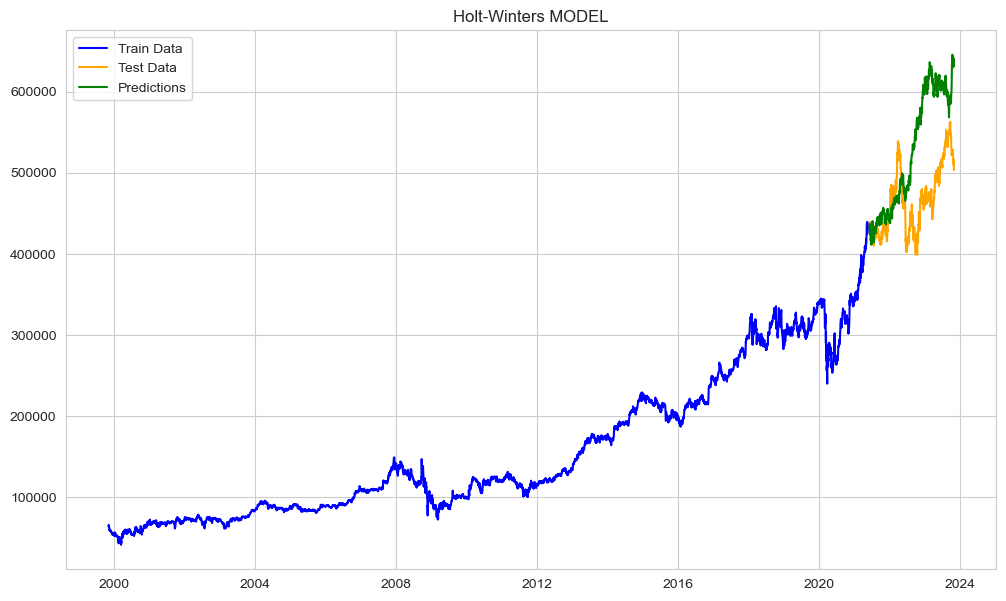

In [495]:
plt.figure(figsize=(12,7))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(test_pred, label='Predictions', color='green')
plt.legend(loc='upper left')
plt.title('Holt-Winters MODEL')
plt.savefig(os.path.join("Images", "Holt Winters.png"))
plt.show()

#### _Step 3.1.3 - Model Evaluation_

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
test_data.describe()

,Close
count,626.000000
mean,465977.843167
std,41102.672210
min,399127.750000
25%,429367.001250
50%,463972.495000
75%,495070.995000
max,563072.760000


In [500]:
# Creating a data frame to log the model names and their error values in it.
Mod_Err = pd.DataFrame(columns=["Model","MAE","RMSE"])

In [501]:
yyy= pd.Series(["Holt-Winters", mean_absolute_error(test_data, test_pred), np.sqrt(mean_squared_error(test_data, test_pred))], index=Mod_Err.columns)

In [502]:
Mod_Err=pd.concat([Mod_Err,yyy.to_frame().T],ignore_index=True)

In [503]:
Mod_Err

,Model,MAE,RMSE
0,Holt-Winters,68820.217143,86489.577906


### _Step 3.2 - AR Model_

#### _Step 3.2.1 - Train Test Split_

In [42]:
p=int(len(df_stats)*0.9)
p

5634

In [43]:
train_data = df_stats.iloc[:p]
test_data = df_stats.iloc[p:]

In [44]:
len(test_data)

626

In [45]:
df_stats.index.freq

<BusinessDay>

#### _Step 3.2.2 - Model fitting_

In [46]:
from statsmodels.tsa.ar_model import AutoReg

In [47]:
model = AutoReg(train_data["Close"],lags=500)

In [48]:
AR1fit = model.fit(cov_kwds={"maxlag" : 500})

In [49]:
pred_ar1 = pd.DataFrame({"Close":AR1fit.predict(start=p,end=(p+len(test_data)-1))})

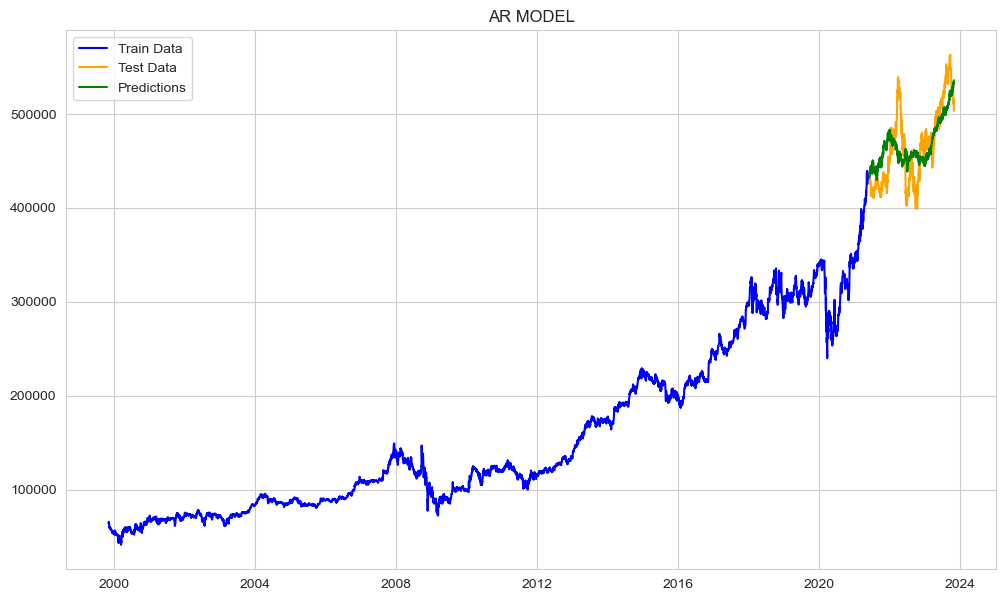

In [494]:
plt.figure(figsize=(12,7))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(pred_ar1, label='Predictions', color='green')
plt.legend(loc='upper left')
plt.title('AR MODEL')
plt.savefig(os.path.join("Images", "AR.png"))
plt.show()

#### _Step 3.2.3 - Model Evaluation_

In [51]:
AR1fit.params

const        -30.901849
Close.L1       0.932391
Close.L2       0.100834
Close.L3      -0.033970
Close.L4      -0.053521
                ...    
Close.L496     0.018521
Close.L497    -0.028021
Close.L498     0.017805
Close.L499    -0.017439
Close.L500     0.007545
Length: 501, dtype: float64

In [504]:
yyy= pd.Series(["AR", mean_absolute_error(test_data,pred_ar1), np.sqrt(mean_squared_error(test_data,pred_ar1))], index=Mod_Err.columns)
Mod_Err=pd.concat([Mod_Err,yyy.to_frame().T],ignore_index=True)

In [505]:
Mod_Err

,Model,MAE,RMSE
0,Holt-Winters,68820.217143,86489.577906
1,AR,23600.832677,28670.686936


### _Step 3.3 - Auto ARIMA Model_

#### _Step 3.3.1 - Train Test Split_

In [54]:
df_stats

,Close
Date,
1999-11-01,63700.00
1999-11-02,65305.00
1999-11-03,65500.00
1999-11-04,65900.00
1999-11-05,65300.00
...,...
2023-10-23,512499.96
2023-10-24,516249.90
2023-10-25,512400.00


In [55]:
p=int(len(df_stats)*0.9)
p

5634

In [56]:
train_data = df_stats.iloc[:p]
test_data = df_stats.iloc[p:]
len(test_data)


626

In [57]:
df_stats.index.freq

<BusinessDay>

#### _Step 3.3.2 - Model fitting_

In [58]:
import pandas as pd
from pmdarima import auto_arima

# Let's make auto_arima model check for the stationarity of the data and if it is, then model will transform it-
# -to a non-stationary data. 
model = auto_arima(train_data, seasonal=False, stationary=True,trace=True)

model.fit(train_data)

forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=102909.603, Time=9.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=144443.485, Time=0.47 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=2.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=140267.202, Time=1.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=152361.346, Time=0.37 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=102899.866, Time=9.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=139284.379, Time=2.98 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=102916.568, Time=5.42 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=102900.563, Time=10.37 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.64 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=102958.447, Time=6.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=102875.894, Time=12.91 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=102823.234, Time=12.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=102824.319, Time=9.30 sec
 ARIMA(4,0,3)(0

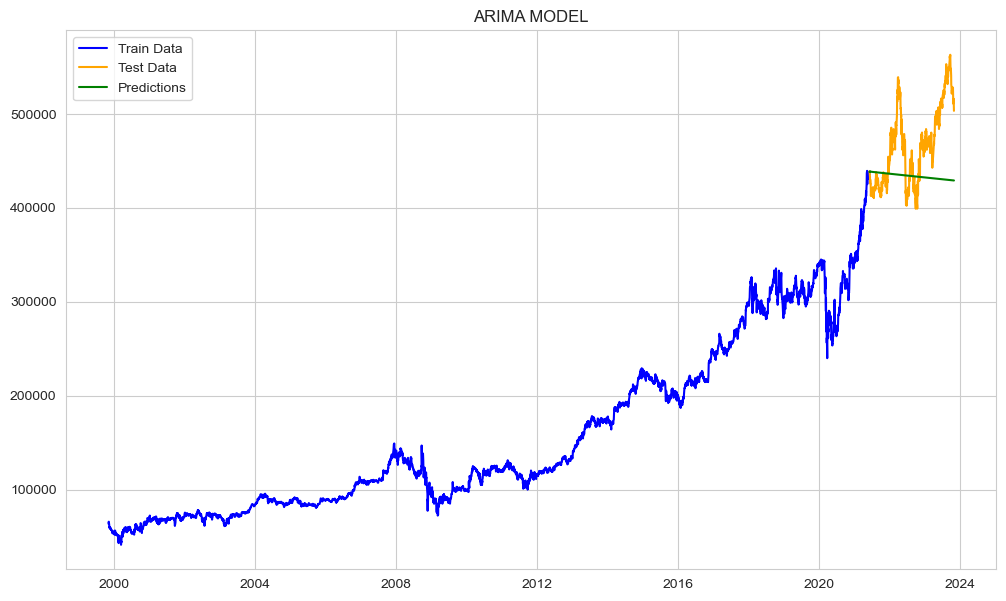

In [493]:
plt.figure(figsize=(12,7))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(forecast, label='Predictions', color='green')
plt.legend(loc='upper left')
plt.title('ARIMA MODEL')
plt.savefig(os.path.join("Images", "ARIMA.png"))
plt.show()

#### _Step 3.3.3 - Model Evaluation_

In [506]:
yyy= pd.Series(["ARIMA", mean_absolute_error(test_data,forecast), np.sqrt(mean_squared_error(test_data,forecast))], index=Mod_Err.columns)
Mod_Err=pd.concat([Mod_Err,yyy.to_frame().T],ignore_index=True)

In [507]:
Mod_Err

,Model,MAE,RMSE
0,Holt-Winters,68820.217143,86489.577906
1,AR,23600.832677,28670.686936
2,ARIMA,41728.161352,53607.177219


### _Step 3.4 - LSTM Model_

#### _Step 3.4.1 - Train Test Split_

In [413]:
df_stats

,Close
Date,
1999-11-01,63700.00
1999-11-02,65305.00
1999-11-03,65500.00
1999-11-04,65900.00
1999-11-05,65300.00
...,...
2023-10-23,512499.96
2023-10-24,516249.90
2023-10-25,512400.00


In [ ]:
# Importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

In [444]:
p = int(len(df_stats) * 0.9)
train_data = df_stats[:p]
test_data = df_stats[p:]

In [445]:
df_stats.index.freq

<BusinessDay>

In [446]:
# Train and prediction(test) split. Every point will be trained with the previous 60 days' close values
train_values = train_data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train_values.reshape(-1,1))

x_train = []
y_train = []

for i in range(60, len(scaled_data)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#### _Step 3.4.2 - Model Fitting_

In [447]:
# Creating a LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_39 (LSTM)              (None, 100)               80400     
                                                                 
 dense_35 (Dense)            (None, 25)                2525      
                                                                 
 dense_36 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [448]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
5574/5574 [==============================] - 133s 23ms/step - loss: 5.0661e-04
Epoch 2/3
5574/5574 [==============================] - 143s 26ms/step - loss: 1.9339e-04
Epoch 3/3
5574/5574 [==============================] - 140s 25ms/step - loss: 1.6978e-04


In [449]:
# Predicting the train values
train_predictions = model.predict(x_train)
# Inverse scaling the values
train_predictions = scaler.inverse_transform(train_predictions)

175/175 [==============================] - 6s 28ms/step


In [450]:
train_predictions_flat = train_predictions.flatten()

In [451]:
train_vs_pred=pd.concat([train_data[-5574:],pd.Series(train_predictions_flat, index=train_data.index[-len(train_predictions_flat):], name="Predictions")],axis=1)

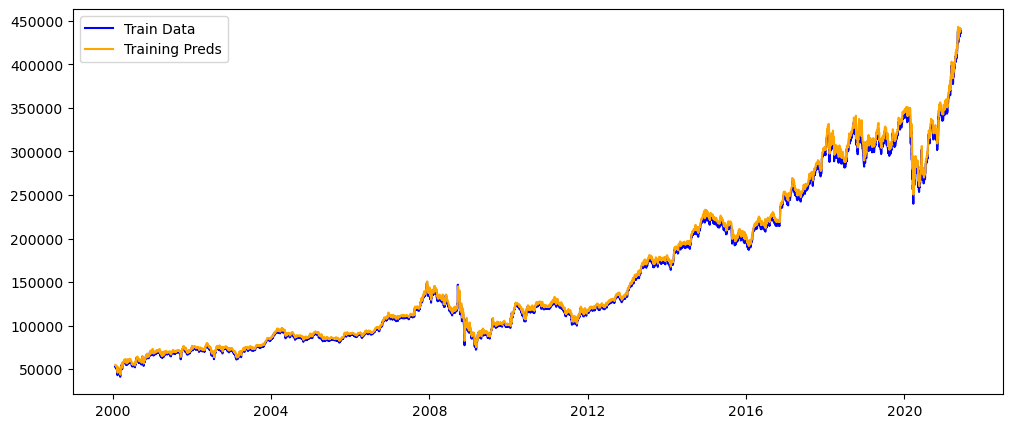

In [452]:
plt.figure(figsize=(12,5))
plt.plot(train_vs_pred["Close"], label='Train Data', color='blue')
plt.plot(train_vs_pred["Predictions"], label='Training Preds', color='orange')
plt.legend(loc='upper left')
plt.show()

In [453]:
# Let's create a base array which will hold the predictions of future dates
future_base = model.predict(x_train)

175/175 [==============================] - 5s 29ms/step


In [ ]:
# The below code will predict the next day (which has not been fed into the algorithm before),
# then the prediction will be appanded to future_base array. This will be an iterative process
last=0
while last<len(test_data):
    next_day_raw = future_base[-60:]
    next_day_raw = np.reshape(next_day_raw,(1,60,1))
    next_day = model.predict(next_day_raw)
    future_base = np.append(future_base, next_day, axis=0)
    last+=1

In [455]:
# Rescaling the future predictions
future_base=future_base*(train_values.max()-train_values.min())+train_values.min()

In [456]:
future_base.shape

(6200, 1)

In [457]:
future_base

array([[ 54796.746],
       [ 54710.723],
       [ 54624.523],
       ...,
       [543734.25 ],
       [543734.25 ],
       [543734.25 ]], dtype=float32)

In [458]:
future_base_flat = future_base.flatten()
test_vs_pred=pd.concat([test_data,pd.Series(future_base_flat[-len(test_data):], index=test_data.index, name="Future_Preds")],axis=1)

In [459]:
test_vs_pred

,Close,Future_Preds
Date,,
2021-06-04,439016.01,445787.18750
2021-06-07,434611.00,450323.87500
2021-06-08,434510.00,454865.09375
2021-06-09,433125.00,459043.65625
2021-06-10,427156.01,462789.93750
...,...,...
2023-10-23,512499.96,543734.25000
2023-10-24,516249.90,543734.25000
2023-10-25,512400.00,543734.25000


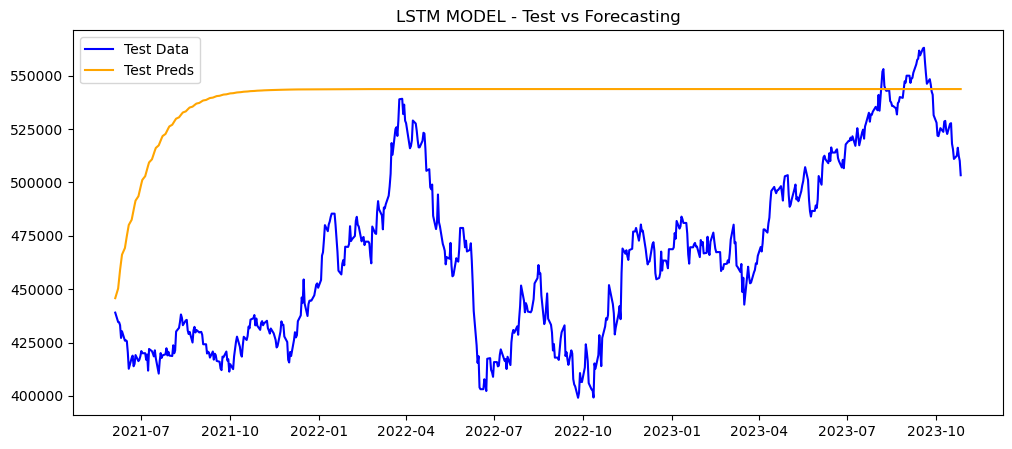

In [460]:
# Lets see the test versus forecasting
plt.figure(figsize=(12,5))
plt.plot(test_vs_pred["Close"], label='Test Data', color='blue')
plt.plot(test_vs_pred["Future_Preds"], label='Test Preds', color='orange')
plt.legend(loc='upper left')
plt.title('LSTM MODEL - Test vs Forecasting')
plt.show()

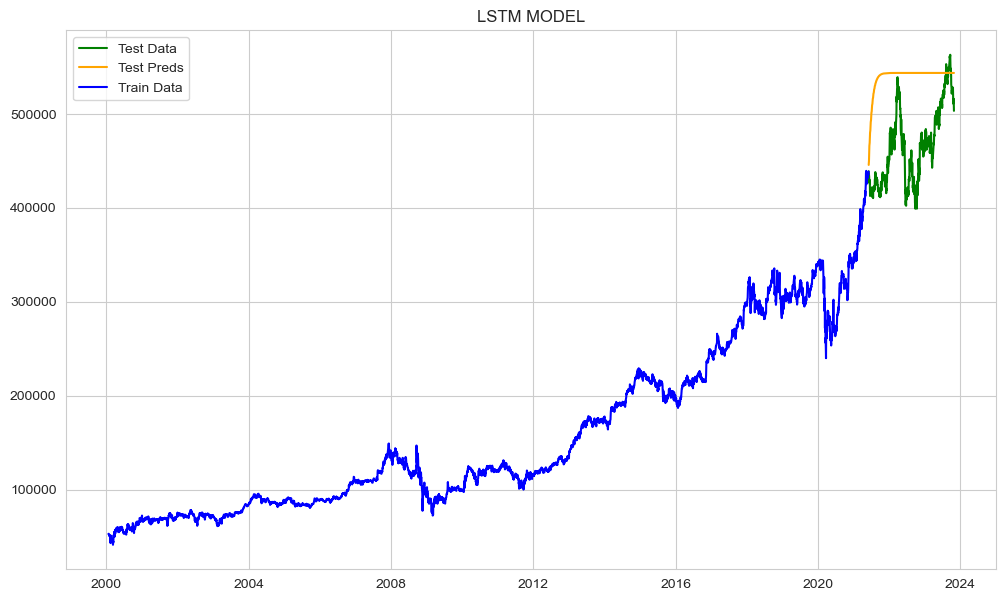

In [492]:
plt.figure(figsize=(12,7))
plt.plot(test_vs_pred["Close"], label='Test Data', color='green')
plt.plot(test_vs_pred["Future_Preds"], label='Test Preds', color='orange')
plt.plot(train_vs_pred["Close"], label='Train Data', color='blue')
plt.title('LSTM MODEL')
plt.legend(loc='upper left')
plt.savefig(os.path.join("Images", "LSTM.png"))
plt.show()


#### _Step 3.4.3 - Model Evaluation_

In [508]:
yyy= pd.Series(["LSTM", mean_absolute_error(test_data,future_base_flat[-len(test_data):]), np.sqrt(mean_squared_error(test_data,future_base_flat[-len(test_data):]))], index=Mod_Err.columns)
Mod_Err=pd.concat([Mod_Err,yyy.to_frame().T],ignore_index=True)

In [509]:
Mod_Err

,Model,MAE,RMSE
0,Holt-Winters,68820.217143,86489.577906
1,AR,23600.832677,28670.686936
2,ARIMA,41728.161352,53607.177219
3,LSTM,74725.170065,83886.306721


### _Step 3.5 - Prophet Model_

#### _Step 3.5.1 - Train Test Split_

In [581]:
df_prophet=df_stats.copy().reset_index()

In [582]:
# Prophet model demands only two columns data frame with spesific names of columns as "y" and "ds"
# for the value that will be predicted and dates respectively.
df_prophet.rename(columns={"Close":"y","Date":"ds"},inplace=True)

In [583]:
df_prophet["ds"]=pd.to_datetime(df_prophet["ds"])

In [584]:
p=int(len(df_stats)*0.9)
p


5634

In [585]:
train_data_prophet = df_prophet.iloc[:p]
test_data_prophet = df_prophet.iloc[p:]
len(test_data)

626

#### _Step 3.5.2 - Model Fitting_

In [586]:
from prophet import Prophet

In [587]:
model=Prophet()
model.fit(train_data_prophet)

16:05:36 - cmdstanpy - INFO - Chain [1] start processing
16:05:40 - cmdstanpy - INFO - Chain [1] done processing


In [588]:
future=model.make_future_dataframe(periods=626)

In [589]:
pred_fb=model.predict(future)

In [590]:
pred_fb

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1999-11-01,53762.218020,33450.405349,68139.081964,53762.218020,53762.218020,-2164.602145,-2164.602145,-2164.602145,-2011.034887,-2011.034887,-2011.034887,-153.567258,-153.567258,-153.567258,0.0,0.0,0.0,51597.615875
1,1999-11-02,53790.717712,34900.164569,68900.463094,53790.717712,53790.717712,-1949.019407,-1949.019407,-1949.019407,-1930.449355,-1930.449355,-1930.449355,-18.570052,-18.570052,-18.570052,0.0,0.0,0.0,51841.698305
2,1999-11-03,53819.217403,36413.073586,69041.864595,53819.217403,53819.217403,-1798.909662,-1798.909662,-1798.909662,-1914.791069,-1914.791069,-1914.791069,115.881407,115.881407,115.881407,0.0,0.0,0.0,52020.307741
3,1999-11-04,53847.717095,35921.466423,69089.605855,53847.717095,53847.717095,-1655.813948,-1655.813948,-1655.813948,-1904.544932,-1904.544932,-1904.544932,248.730984,248.730984,248.730984,0.0,0.0,0.0,52191.903147
4,1999-11-05,53876.216786,35756.471659,69257.536074,53876.216786,53876.216786,-1547.612360,-1547.612360,-1547.612360,-1926.636370,-1926.636370,-1926.636370,379.024010,379.024010,379.024010,0.0,0.0,0.0,52328.604427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6255,2023-02-15,397196.785326,361650.410240,434688.713033,365490.218160,432024.181793,-99.397818,-99.397818,-99.397818,-1914.791069,-1914.791069,-1914.791069,1815.393251,1815.393251,1815.393251,0.0,0.0,0.0,397097.387508
6256,2023-02-16,397260.001553,361313.713318,433268.045431,365394.925332,432174.548249,-39.023533,-39.023533,-39.023533,-1904.544932,-1904.544932,-1904.544932,1865.521399,1865.521399,1865.521399,0.0,0.0,0.0,397220.978020
6257,2023-02-17,397323.217781,361791.492864,434292.757824,365299.632504,432322.803374,-7.490926,-7.490926,-7.490926,-1926.636370,-1926.636370,-1926.636370,1919.145444,1919.145444,1919.145444,0.0,0.0,0.0,397315.726855
6258,2023-02-18,397386.434009,369199.777147,442378.266229,365204.339676,432464.860988,6819.206430,6819.206430,6819.206430,4843.727486,4843.727486,4843.727486,1975.478944,1975.478944,1975.478944,0.0,0.0,0.0,404205.640438


#### _Step 3.5.3 - Model Evaluation_

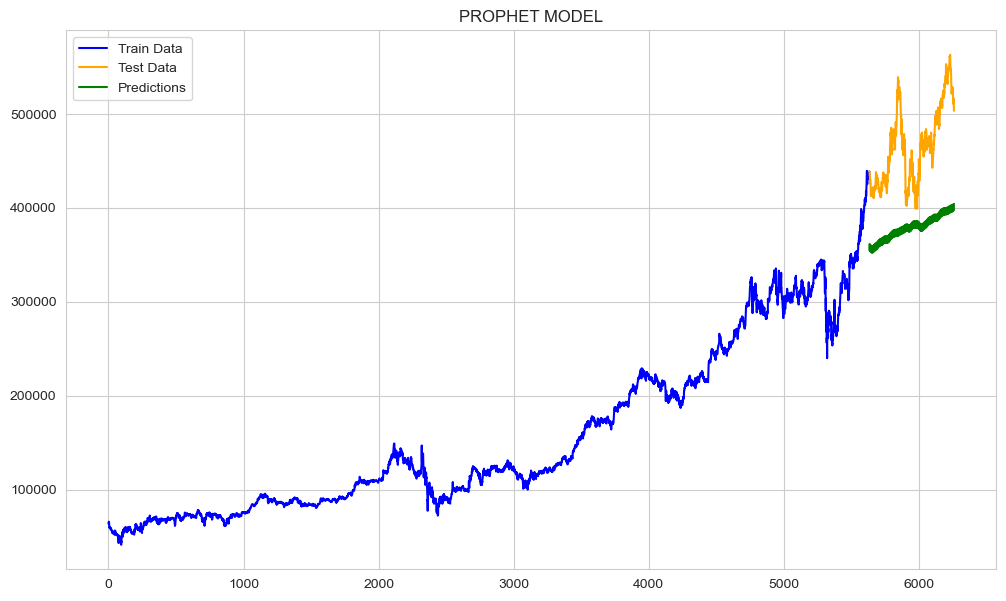

In [591]:
plt.figure(figsize=(12,7))
plt.plot(train_data_prophet["y"], label='Train Data', color='blue')
plt.plot(test_data_prophet["y"], label='Test Data', color='orange')
plt.plot(pred_fb.iloc[p:]["yhat"], label='Predictions', color='green')
plt.legend(loc='upper left')
plt.title('PROPHET MODEL')
plt.savefig(os.path.join("Images", "Prophet.png"))
plt.show()

c:\Users\Asus\anaconda3\Lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Asus\anaconda3\Lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\Asus\anaconda3\Lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

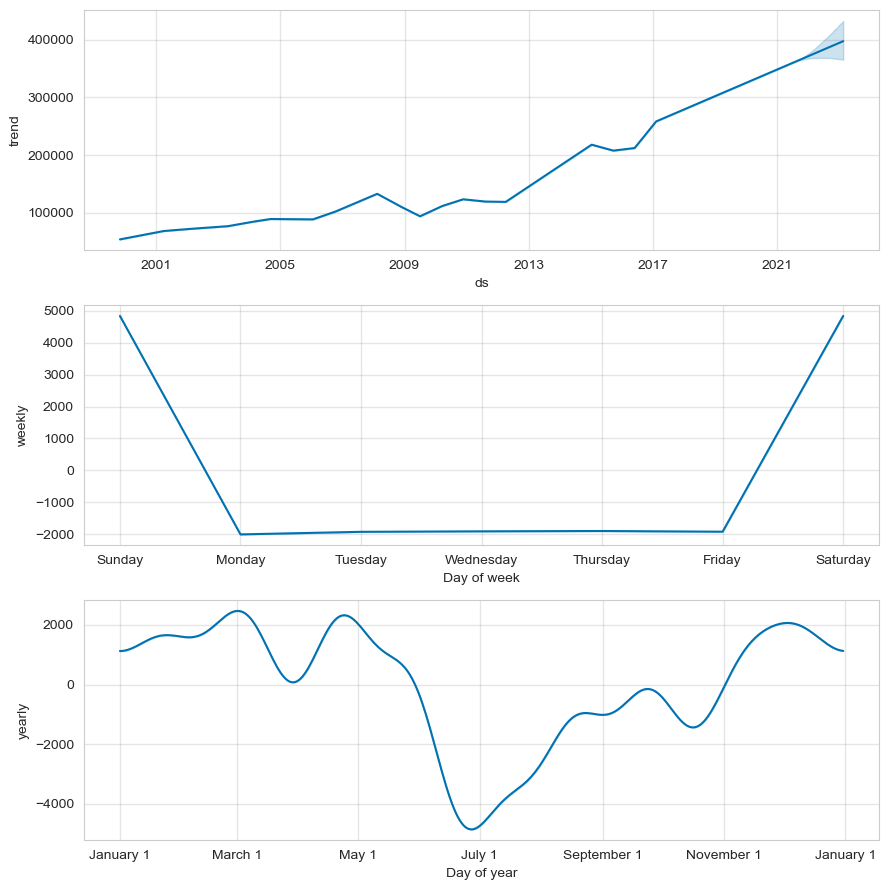

In [592]:
model.plot_components(pred_fb);

In [535]:
yyy= pd.Series(["Prophet", mean_absolute_error(test_data,pred_fb["yhat"].iloc[p:]), np.sqrt(mean_squared_error(test_data,pred_fb["yhat"].iloc[p:]))], index=Mod_Err.columns)
Mod_Err=pd.concat([Mod_Err,yyy.to_frame().T],ignore_index=True)
Mod_Err

,Model,MAE,RMSE
0,Holt-Winters,68820.217143,86489.577906
1,AR,23600.832677,28670.686936
2,ARIMA,41728.161352,53607.177219
3,LSTM,74725.170065,83886.306721
4,Prophet,88488.179242,94738.770407


### _Step 3.6 - Model Comparison_

C:\Users\Asus\AppData\Local\Temp\ipykernel_6744\3515907017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=Mod_Err, x="Model", y="RMSE", palette="pastel")


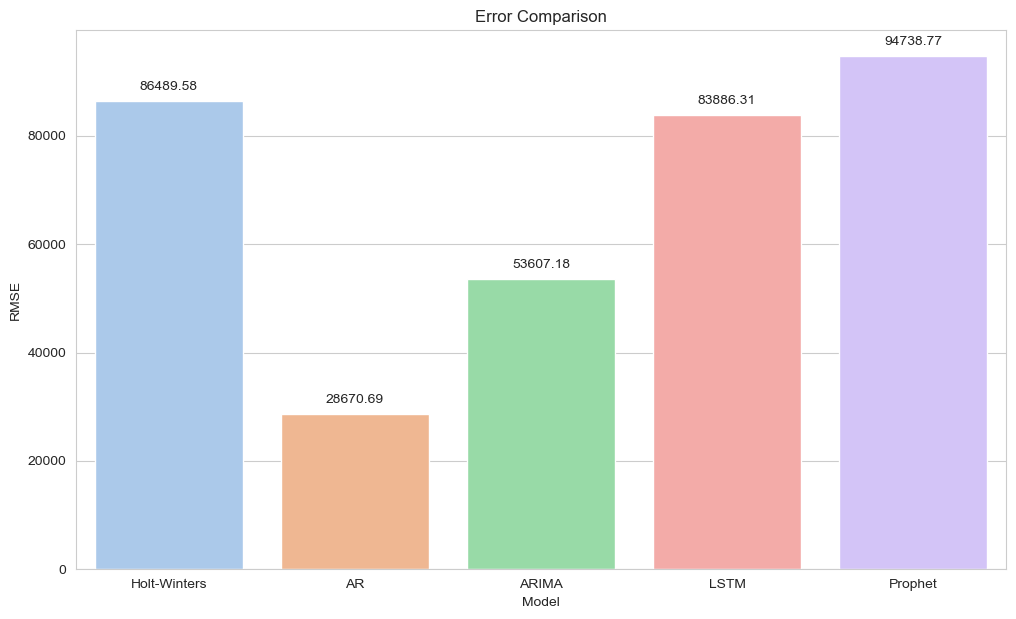

In [578]:
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax = sns.barplot(data=Mod_Err, x="Model", y="RMSE", palette="pastel")

# Let's put the values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title("Error Comparison")
plt.savefig(os.path.join("Images", "Model Comparison.png"))
plt.show()

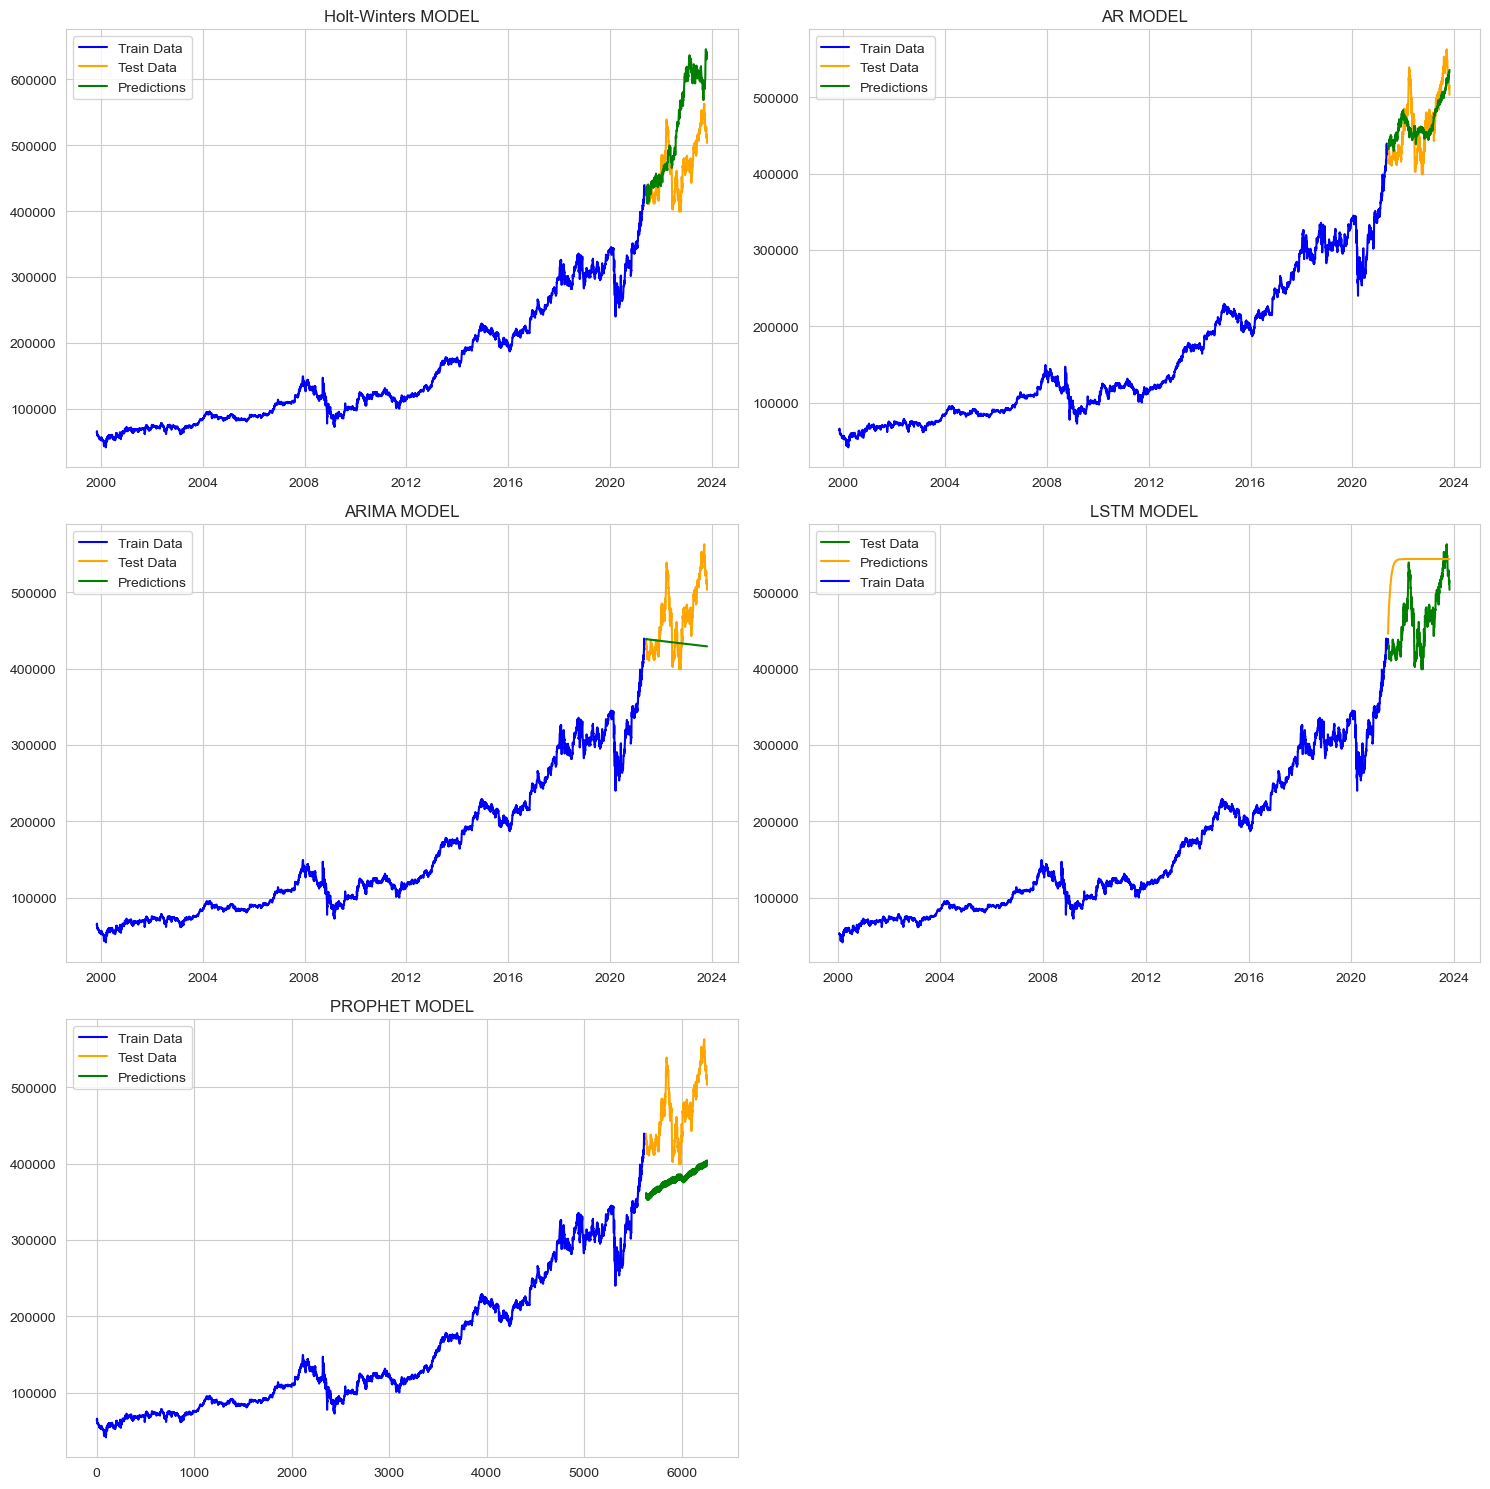

In [593]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# 1st Graph
axs[0, 0].plot(train_data, label='Train Data', color='blue')
axs[0, 0].plot(test_data, label='Test Data', color='orange')
axs[0, 0].plot(test_pred, label='Predictions', color='green')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('Holt-Winters MODEL')

# 2nd Graph
axs[0, 1].plot(train_data, label='Train Data', color='blue')
axs[0, 1].plot(test_data, label='Test Data', color='orange')
axs[0, 1].plot(pred_ar1, label='Predictions', color='green')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('AR MODEL')

# 3rd Graph
axs[1, 0].plot(train_data, label='Train Data', color='blue')
axs[1, 0].plot(test_data, label='Test Data', color='orange')
axs[1, 0].plot(forecast, label='Predictions', color='green')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('ARIMA MODEL')

# 4th Graph
axs[1, 1].plot(test_vs_pred["Close"], label='Test Data', color='green')
axs[1, 1].plot(test_vs_pred["Future_Preds"], label='Predictions', color='orange')
axs[1, 1].plot(train_vs_pred["Close"], label='Train Data', color='blue')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('LSTM MODEL')

# 5th Graph
axs[2, 0].plot(train_data_prophet["y"], label='Train Data', color='blue')
axs[2, 0].plot(test_data_prophet["y"], label='Test Data', color='orange')
axs[2, 0].plot(pred_fb.iloc[p:]["yhat"], label='Predictions', color='green')
axs[2, 0].legend(loc='upper left')
axs[2, 0].set_title('PROPHET MODEL')

# Deleting the empty ax
axs[2, 1].axis('off')

plt.tight_layout()
plt.savefig(os.path.join("Images", "All Models.png"))
plt.show()